In [22]:
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
from keras_tqdm import TQDMNotebookCallback

sns.set()

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

Training datasets: 60000
Test datasets: 10000


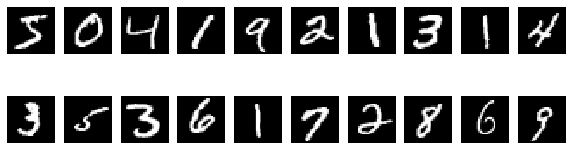

In [4]:
# import train and test data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Training datasets:", X_train.shape[0])
print("Test datasets:", X_test.shape[0])

fig = plt.figure(figsize=(10, 3))

for i in range(20):
    fig.add_subplot(2, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis("off")

# set datatype to float and normalize
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Onehot encoding of the classes
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [97]:
def create_model(n_hidden: int = 1, n_units: int = 10, lr: float = 0.01) -> tf.keras.models.Sequential:
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28,)))
    for i in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_units, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    model.compile(
        loss=tf.keras.losses.categorical_crossentropy,
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        metrics=["accuracy"],
    )
    return model

accuracy = []
val_accuracy = []

In [98]:
parameters = dict(
    n_hidden=10,
    n_units=100,
    lr=0.001,
    n_epochs=20,
    batch_size=254
)

model = create_model(
    n_hidden=parameters["n_hidden"],
    n_units=parameters["n_units"],
    lr=parameters["lr"]
)

history = model.fit(
    X_train,
    y_train,
    batch_size=parameters["batch_size"],
    epochs=parameters["n_epochs"],
    verbose=2,
    validation_data=(X_test, y_test),
)


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 3s - loss: 0.5263 - accuracy: 0.8276 - val_loss: 0.2061 - val_accuracy: 0.9381
Epoch 2/20
60000/60000 - 2s - loss: 0.1619 - accuracy: 0.9523 - val_loss: 0.1581 - val_accuracy: 0.9517
Epoch 3/20
60000/60000 - 2s - loss: 0.1160 - accuracy: 0.9659 - val_loss: 0.1447 - val_accuracy: 0.9573
Epoch 4/20
60000/60000 - 2s - loss: 0.0862 - accuracy: 0.9739 - val_loss: 0.0983 - val_accuracy: 0.9705
Epoch 5/20
60000/60000 - 2s - loss: 0.0742 - accuracy: 0.9779 - val_loss: 0.1005 - val_accuracy: 0.9711
Epoch 6/20
60000/60000 - 2s - loss: 0.0653 - accuracy: 0.9804 - val_loss: 0.0932 - val_accuracy: 0.9749
Epoch 7/20
60000/60000 - 4s - loss: 0.0562 - accuracy: 0.9833 - val_loss: 0.0979 - val_accuracy: 0.9722
Epoch 8/20
60000/60000 - 3s - loss: 0.0440 - accuracy: 0.9873 - val_loss: 0.1063 - val_accuracy: 0.9732
Epoch 9/20
60000/60000 - 2s - loss: 0.0433 - accuracy: 0.9876 - val_loss: 0.1049 - val_accuracy: 0.9740
Epoch 10/20
60

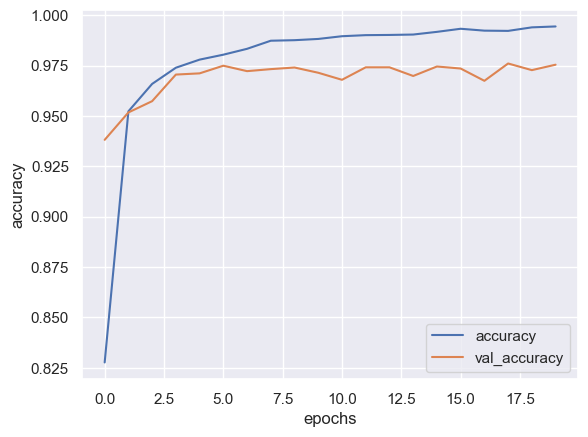

In [99]:
sns.set()
sns.lineplot(data=np.array(history.history["accuracy"]), label="accuracy")
sns.lineplot(data=np.array(history.history["val_accuracy"]), label="val_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

In [100]:
n_classes = 10
n_rows, n_cols = 28, 28  # image dimensions

with open("handwritten.pkl", "rb") as f:
    X_hw, y_hw = pickle.load(f)
    
# reshape
X_hw = X_hw.reshape(X_hw.shape[0], n_rows, n_cols, 1)

# normalize
X_hw = 1.0 - (X_hw.astype("float32") / 255.0)

# categorize
y_hw = tf.keras.utils.to_categorical(y_hw, n_classes)

In [101]:
score = model.evaluate(X_hw.reshape(100, 28, 28), y_hw, verbose=0)
print(f"Test accuracy with handwritten digits: {score[1]:.3f}")

Test accuracy with handwritten digits: 0.830


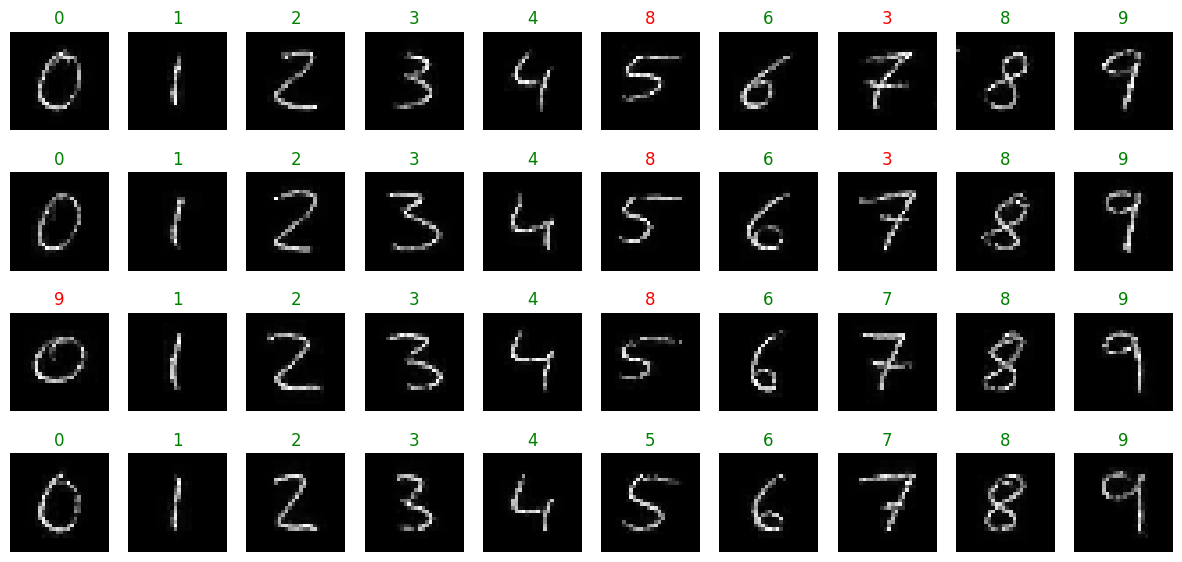

In [102]:
sns.reset_defaults()
y_pred = model.predict_classes(X_hw.reshape(-1, 28, 28))

fig = plt.figure(figsize=(15, 7))

for i in range(40):
    ax = fig.add_subplot(4, 10, i+1)
    plt.imshow(X_hw[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
    correct = y_pred[i] == np.argmax(y_hw[i])
    plt.title(y_pred[i], color="green" if correct else "red");